In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("diabetes.csv")


In [4]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape


(768, 9)

In [6]:
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
missing_cols = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"
]


In [10]:
zero_counts = (df[missing_cols] == 0).sum()
zero_counts


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [11]:
missing_percentage = (zero_counts / len(df)) * 100
missing_percentage


Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64

In [12]:
missing_summary = pd.DataFrame({
    "Zero_Count": zero_counts,
    "Missing_Percentage": missing_percentage
})

missing_summary


,Zero_Count,Missing_Percentage
Glucose,5,0.651042
BloodPressure,35,4.557292
SkinThickness,227,29.557292
Insulin,374,48.697917
BMI,11,1.432292


<div dir=rtl>
بخش دوم: تبدیل صفرها به NaN
<div>

In [83]:
df[missing_cols] = df[missing_cols].replace(0, np.nan)


In [15]:
df[missing_cols].isnull().sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [16]:
(df[missing_cols].isnull().mean() * 100)


Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64

In [17]:
nan_summary = pd.DataFrame({
    "NaN_Count": df[missing_cols].isnull().sum(),
    "NaN_Percentage": df[missing_cols].isnull().mean() * 100
})

nan_summary


,NaN_Count,NaN_Percentage
Glucose,5,0.651042
BloodPressure,35,4.557292
SkinThickness,227,29.557292
Insulin,374,48.697917
BMI,11,1.432292


## Strategy A

In [20]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler


In [21]:
df_strategy_A = df.copy()


In [22]:
imputer_mean = SimpleImputer(strategy="mean")

df_strategy_A[missing_cols] = imputer_mean.fit_transform(df_strategy_A[missing_cols])


In [23]:
print("NaN count after Strategy A:")
print(df_strategy_A[missing_cols].isnull().sum())


NaN count after Strategy A:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [24]:
glucose_mean_before = df["Glucose"].mean(skipna=True)
glucose_mean_after  = df_strategy_A["Glucose"].mean()

print("Glucose mean BEFORE (ignoring NaNs):", glucose_mean_before)
print("Glucose mean AFTER  (mean imputation):", glucose_mean_after)
print("Difference:", glucose_mean_after - glucose_mean_before)


Glucose mean BEFORE (ignoring NaNs): 121.6867627785059
Glucose mean AFTER  (mean imputation): 121.68676277850591
Difference: 1.4210854715202004e-14


# Strategy B

In [25]:
df_strategy_B = df.copy()


In [26]:
for col in missing_cols:
    group_means = df_strategy_B.groupby("Outcome")[col].transform("mean")
    df_strategy_B[col] = df_strategy_B[col].fillna(group_means)


In [27]:
print("NaN count after Strategy B:")
print(df_strategy_B[missing_cols].isnull().sum())


NaN count after Strategy B:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [28]:
g0 = df_strategy_B.loc[df_strategy_B["Outcome"] == 0, "Glucose"].mean()
g1 = df_strategy_B.loc[df_strategy_B["Outcome"] == 1, "Glucose"].mean()

print("Mean Glucose | Outcome=0:", g0)
print("Mean Glucose | Outcome=1:", g1)
print("Difference (1 - 0):", g1 - g0)


Mean Glucose | Outcome=0: 110.64386317907444
Mean Glucose | Outcome=1: 142.31954887218043
Difference (1 - 0): 31.67568569310599


## Strategy C   KNN Imputation (n_neighbors=5)

In [29]:
df_strategy_C = df.copy()


In [30]:
feature_cols = [c for c in df_strategy_C.columns if c != "Outcome"]

X = df_strategy_C[feature_cols].copy()
y = df_strategy_C["Outcome"].copy()


In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [32]:
knn_imputer = KNNImputer(n_neighbors=5)

X_scaled_imputed = knn_imputer.fit_transform(X_scaled)


In [33]:
X_imputed = scaler.inverse_transform(X_scaled_imputed)

df_strategy_C[feature_cols] = X_imputed
df_strategy_C["Outcome"] = y


In [34]:
print("NaN count after Strategy C:")
print(df_strategy_C[missing_cols].isnull().sum())


NaN count after Strategy C:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


## Feature Engineering

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
def glucose_category(g):
    if g < 100:
        return "Normal"
    elif 100 <= g <= 125:
        return "Prediabetes"
    else:
        return "Diabetic"

df_strategy_B["Glucose_Category"] = df_strategy_B["Glucose"].apply(glucose_category)


In [37]:
glucose_diabetes_rate = (
    df_strategy_B
    .groupby("Glucose_Category")["Outcome"]
    .mean() * 100
)

glucose_diabetes_rate


Glucose_Category
Diabetic       59.531773
Normal          7.291667
Prediabetes    27.436823
Name: Outcome, dtype: float64

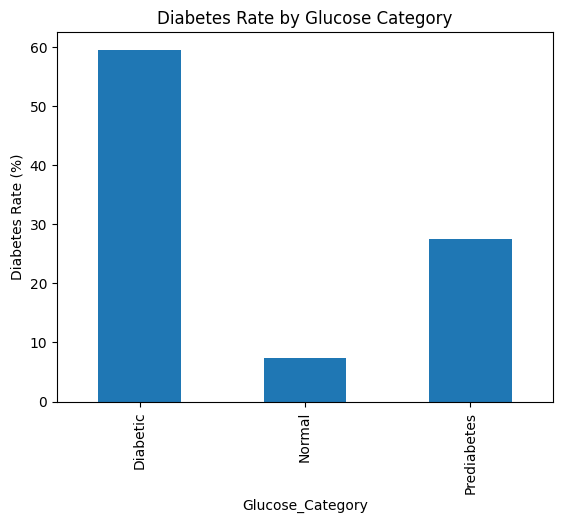

In [38]:
glucose_diabetes_rate.plot(kind="bar")
plt.ylabel("Diabetes Rate (%)")
plt.title("Diabetes Rate by Glucose Category")
plt.show()


# BMI (BMI_Category)

In [39]:
def bmi_category(b):
    if b < 18.5:
        return "Underweight"
    elif 18.5 <= b < 25:
        return "Normal"
    elif 25 <= b < 30:
        return "Overweight"
    else:
        return "Obese"

df_strategy_B["BMI_Category"] = df_strategy_B["BMI"].apply(bmi_category)


In [40]:
bmi_diabetes_rate = (
    df_strategy_B
    .groupby("BMI_Category")["Outcome"]
    .mean() * 100
)

bmi_diabetes_rate


BMI_Category
Normal          6.862745
Obese          45.755694
Overweight     22.346369
Underweight     0.000000
Name: Outcome, dtype: float64

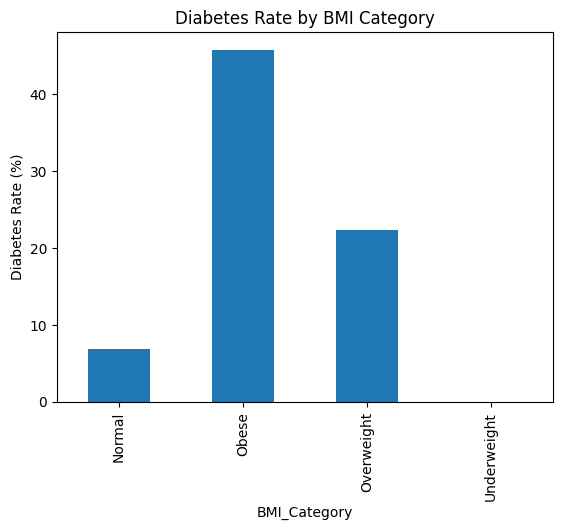

In [41]:
bmi_diabetes_rate.plot(kind="bar")
plt.ylabel("Diabetes Rate (%)")
plt.title("Diabetes Rate by BMI Category")
plt.show()


# (Age_Group)

In [42]:
def age_group(a):
    if 21 <= a <= 30:
        return "Young"
    elif 31 <= a <= 45:
        return "Middle_Aged"
    elif 46 <= a <= 60:
        return "Senior"
    else:
        return "Elderly"

df_strategy_B["Age_Group"] = df_strategy_B["Age"].apply(age_group)


In [43]:
age_diabetes_rate = (
    df_strategy_B
    .groupby("Age_Group")["Outcome"]
    .mean() * 100
)

age_diabetes_rate


Age_Group
Elderly        25.925926
Middle_Aged    51.502146
Senior         56.043956
Young          21.582734
Name: Outcome, dtype: float64

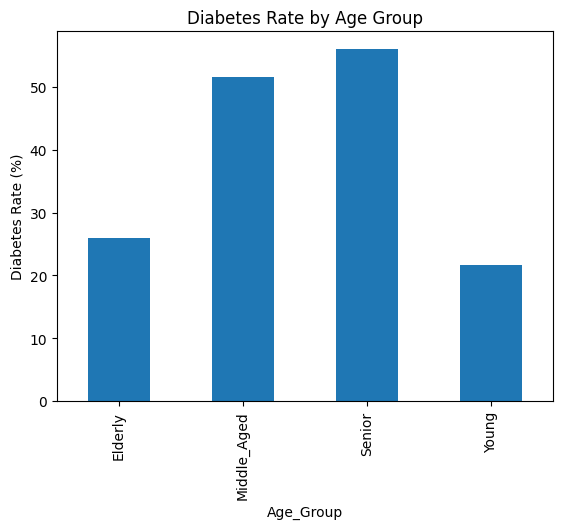

In [44]:
age_diabetes_rate.plot(kind="bar")
plt.ylabel("Diabetes Rate (%)")
plt.title("Diabetes Rate by Age Group")
plt.show()


## Insulin_to_Glucose_Ratio

In [45]:
df_strategy_B["Insulin_to_Glucose_Ratio"] = (
    df_strategy_B["Insulin"] / df_strategy_B["Glucose"]
)


In [46]:
correlation_ratio = df_strategy_B[
    ["Insulin_to_Glucose_Ratio", "Outcome"]
].corr().iloc[0, 1]

correlation_ratio


np.float64(0.2537341227174819)

In [47]:
def bp_category(bp):
    if bp < 80:
        return "Low"
    elif 80 <= bp <= 90:
        return "Normal"
    else:
        return "High"

df_strategy_B["BloodPressure_Category"] = df_strategy_B["BloodPressure"].apply(bp_category)


In [48]:
bp_diabetes_rate = (
    df_strategy_B
    .groupby("BloodPressure_Category")["Outcome"]
    .mean() * 100
)

bp_diabetes_rate


BloodPressure_Category
High      47.368421
Low       31.616341
Normal    43.113772
Name: Outcome, dtype: float64

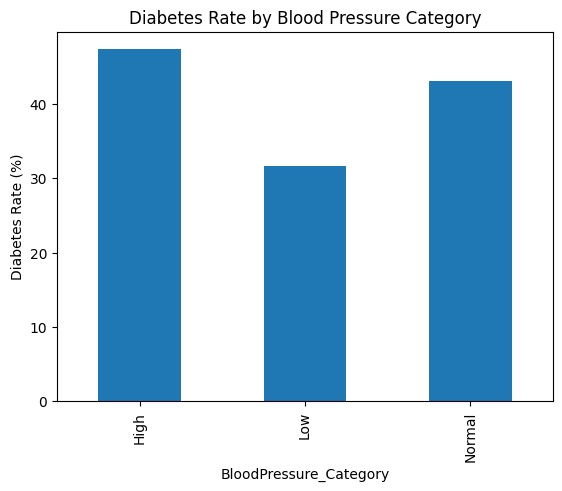

In [49]:
bp_diabetes_rate.plot(kind="bar")
plt.ylabel("Diabetes Rate (%)")
plt.title("Diabetes Rate by Blood Pressure Category")
plt.show()


## SVM

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)
from sklearn.svm import SVC


In [51]:
# Target
y = df_strategy_B["Outcome"]

# Categorical features created in Feature Engineering
categorical_cols = [
    "Glucose_Category",
    "BMI_Category",
    "Age_Group",
    "BloodPressure_Category"
]

# Numerical continuous features (to be scaled)
numeric_cols = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Insulin_to_Glucose_Ratio"
]


In [52]:
X_cat = pd.get_dummies(
    df_strategy_B[categorical_cols],
    drop_first=True
)


In [53]:
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df_strategy_B[numeric_cols])

X_num_scaled = pd.DataFrame(
    X_num_scaled,
    columns=numeric_cols,
    index=df_strategy_B.index
)


In [54]:
X = pd.concat([X_num_scaled, X_cat], axis=1)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# 1) Linear Kernel

In [56]:
svm_linear = SVC(kernel="linear", random_state=42)

svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)


## 2) RBF Kernel

In [57]:
svm_rbf = SVC(kernel="rbf", random_state=42)

svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)


# 3) Polynomial Kernel (degree=3)

In [58]:
svm_poly = SVC(kernel="poly", degree=3, random_state=42)

svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)


# Stage 3: Evaluation and Comparison

In [59]:
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "Confusion Matrix": confusion_matrix(y_true, y_pred)
    }


In [61]:
results_linear = evaluate_model(y_test, y_pred_linear)
results_rbf    = evaluate_model(y_test, y_pred_rbf)
results_poly   = evaluate_model(y_test, y_pred_poly)


In [62]:
results_linear, results_rbf, results_poly


({'Accuracy': 0.7987012987012987,
  'Precision': 0.6716417910447762,
  'Recall': 0.8333333333333334,
  'F1': 0.743801652892562,
  'Confusion Matrix': array([[78, 22],
         [ 9, 45]])},
 {'Accuracy': 0.8376623376623377,
  'Precision': 0.7457627118644068,
  'Recall': 0.8148148148148148,
  'F1': 0.7787610619469026,
  'Confusion Matrix': array([[85, 15],
         [10, 44]])},
 {'Accuracy': 0.7662337662337663,
  'Precision': 0.68,
  'Recall': 0.6296296296296297,
  'F1': 0.6538461538461539,
  'Confusion Matrix': array([[84, 16],
         [20, 34]])})

In [65]:
results_linear["Confusion Matrix"]

array([[78, 22],
       [ 9, 45]])

In [66]:
results_rbf["Confusion Matrix"]


array([[85, 15],
       [10, 44]])

In [67]:

results_poly["Confusion Matrix"]

array([[84, 16],
       [20, 34]])

In [68]:
print("FN Linear:", results_linear["Confusion Matrix"][1, 0])
print("FN RBF:", results_rbf["Confusion Matrix"][1, 0])
print("FN Poly:", results_poly["Confusion Matrix"][1, 0])


FN Linear: 9
FN RBF: 10
FN Poly: 20


# 0) Imports + Load + Convert “medical zeros” to NaN

In [69]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC

# Load dataset
df_raw = pd.read_csv("diabetes.csv")

# Columns where 0 means missing (medically impossible)
missing_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 -> NaN for those columns
df_raw[missing_cols] = df_raw[missing_cols].replace(0, np.nan)

print("NaN count after converting medical zeros to NaN:")
print(df_raw[missing_cols].isnull().sum())


NaN count after converting medical zeros to NaN:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


# 1) Feature Engineering Functions (5 new features)

In [70]:
def add_feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create 5 engineered features:
    1) Glucose_Category
    2) BMI_Category
    3) Age_Group
    4) Insulin_to_Glucose_Ratio
    5) BloodPressure_Category
    """
    df = df.copy()

    # 1) Glucose category
    def glucose_category(g):
        if g < 100:
            return "Normal"
        elif 100 <= g <= 125:
            return "Prediabetes"
        else:
            return "Diabetic"

    # 2) BMI category (WHO)
    def bmi_category(b):
        if b < 18.5:
            return "Underweight"
        elif 18.5 <= b < 25:
            return "Normal"
        elif 25 <= b < 30:
            return "Overweight"
        else:
            return "Obese"

    # 3) Age grouping
    def age_group(a):
        if 21 <= a <= 30:
            return "Young"
        elif 31 <= a <= 45:
            return "Middle_Aged"
        elif 46 <= a <= 60:
            return "Senior"
        else:
            return "Elderly"

    # 5) Diastolic blood pressure category
    def bp_category(bp):
        if bp < 80:
            return "Low"
        elif 80 <= bp <= 90:
            return "Normal"
        else:
            return "High"

    df["Glucose_Category"] = df["Glucose"].apply(glucose_category)
    df["BMI_Category"] = df["BMI"].apply(bmi_category)
    df["Age_Group"] = df["Age"].apply(age_group)
    df["BloodPressure_Category"] = df["BloodPressure"].apply(bp_category)

    # 4) Ratio feature (safe division)
    df["Insulin_to_Glucose_Ratio"] = df["Insulin"] / df["Glucose"]

    return df


# Strategy A: Simple Mean (global mean)

In [71]:
def impute_strategy_A(df: pd.DataFrame, cols_with_missing: list[str]) -> pd.DataFrame:
    # Mean imputation for specified columns
    dfA = df.copy()
    imputer = SimpleImputer(strategy="mean")
    dfA[cols_with_missing] = imputer.fit_transform(dfA[cols_with_missing])
    return dfA


# Strategy B: Group-wise Mean (by Outcome)

In [72]:
def impute_strategy_B(df: pd.DataFrame, cols_with_missing: list[str]) -> pd.DataFrame:
    # Group mean imputation conditional on Outcome
    dfB = df.copy()
    for col in cols_with_missing:
        group_means = dfB.groupby("Outcome")[col].transform("mean")
        dfB[col] = dfB[col].fillna(group_means)
    return dfB


# Strategy C: KNN Imputation (k=5)

In [73]:
def impute_strategy_C(df: pd.DataFrame, cols_with_missing: list[str], n_neighbors: int = 5) -> pd.DataFrame:
    dfC = df.copy()

    # KNNImputer works with distances; scaling can help, but here we keep it simple for the 5 columns only.
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    dfC[cols_with_missing] = knn_imputer.fit_transform(dfC[cols_with_missing])

    return dfC


# 3) Build Modeling Dataset (One-Hot + Scaling ONLY continuous)

In [74]:
def prepare_X_y(df_after_fe: pd.DataFrame):
    # Target
    y = df_after_fe["Outcome"].astype(int)

    # Categorical engineered features
    categorical_cols = ["Glucose_Category", "BMI_Category", "Age_Group", "BloodPressure_Category"]

    # One-hot encode categoricals
    X_cat = pd.get_dummies(df_after_fe[categorical_cols], drop_first=True)

    # Continuous numeric features (scale these ONLY)
    numeric_cols = [
        "Pregnancies",
        "Glucose",
        "BloodPressure",
        "SkinThickness",
        "Insulin",
        "BMI",
        "DiabetesPedigreeFunction",
        "Age",
        "Insulin_to_Glucose_Ratio"
    ]

    X_num = df_after_fe[numeric_cols].copy()

    # Return separate blocks so we can scale numeric only
    return X_num, X_cat, y


# 4) Train/Evaluate One Kernel (helper)

In [75]:
def evaluate_predictions(y_true, y_pred) -> dict:
    cm = confusion_matrix(y_true, y_pred)
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0),
        "TN": int(cm[0, 0]),
        "FP": int(cm[0, 1]),
        "FN": int(cm[1, 0]),
        "TP": int(cm[1, 1]),
    }


# 5) Main Loop: Run all (A/B/C) × (Linear/RBF/Poly)

In [76]:
def run_full_experiment(df_base: pd.DataFrame):
    results = []

    imputation_strategies = {
        "A_mean": lambda d: impute_strategy_A(d, missing_cols),
        "B_group_mean": lambda d: impute_strategy_B(d, missing_cols),
        "C_knn5": lambda d: impute_strategy_C(d, missing_cols, n_neighbors=5),
    }

    kernels = {
        "linear": SVC(kernel="linear", random_state=42),
        "rbf": SVC(kernel="rbf", random_state=42),
        "poly_deg3": SVC(kernel="poly", degree=3, random_state=42),
    }

    for imp_name, imp_func in imputation_strategies.items():

        # 1) Impute
        df_imp = imp_func(df_base)

        # 2) Verify no NaN in medical-missing columns
        nan_count = df_imp[missing_cols].isnull().sum().sum()
        if nan_count != 0:
            print(f"WARNING: {imp_name} still has NaNs in missing_cols: {nan_count}")

        # 3) Feature Engineering
        df_fe = add_feature_engineering(df_imp)

        # 4) Prepare X blocks and y
        X_num, X_cat, y = prepare_X_y(df_fe)

        # 5) Train/Test split with stratify
        X_num_train, X_num_test, X_cat_train, X_cat_test, y_train, y_test = train_test_split(
            X_num, X_cat, y,
            test_size=0.2,
            random_state=42,
            stratify=y
        )

        # 6) Scale numeric only (fit on train, transform train/test)
        scaler = StandardScaler()
        X_num_train_scaled = pd.DataFrame(
            scaler.fit_transform(X_num_train),
            columns=X_num_train.columns,
            index=X_num_train.index
        )
        X_num_test_scaled = pd.DataFrame(
            scaler.transform(X_num_test),
            columns=X_num_test.columns,
            index=X_num_test.index
        )

        # 7) Combine scaled numeric + one-hot categorical (no scaling for one-hot)
        X_train = pd.concat([X_num_train_scaled, X_cat_train], axis=1)
        X_test = pd.concat([X_num_test_scaled, X_cat_test], axis=1)

        for kernel_name, model in kernels.items():
            # 8) Train
            clf = model
            clf.fit(X_train, y_train)

            # 9) Predict
            y_pred = clf.predict(X_test)

            # 10) Evaluate
            metrics = evaluate_predictions(y_test, y_pred)

            results.append({
                "Imputation": imp_name,
                "Kernel": kernel_name,
                **metrics
            })

    return pd.DataFrame(results)


# 6) Execute + Find Best Combination + Detect Patterns

In [77]:
results_df = run_full_experiment(df_raw)

# Sort by F1 descending
results_sorted = results_df.sort_values(by="F1", ascending=False)

print("=== All results sorted by F1 (descending) ===")
print(results_sorted[["Imputation", "Kernel", "Accuracy", "Precision", "Recall", "F1", "FN", "FP"]])

# Best combo
best_row = results_sorted.iloc[0]
print("\n=== Best combination by F1 ===")
print(best_row[["Imputation", "Kernel", "Accuracy", "Precision", "Recall", "F1", "FN", "FP"]])

# Pattern: does one imputation dominate across kernels?
avg_by_imputation = results_df.groupby("Imputation")["F1"].mean().sort_values(ascending=False)
print("\n=== Average F1 by Imputation (higher is better) ===")
print(avg_by_imputation)

# Pattern: best kernel overall (averaged over imputations)
avg_by_kernel = results_df.groupby("Kernel")["F1"].mean().sort_values(ascending=False)
print("\n=== Average F1 by Kernel (higher is better) ===")
print(avg_by_kernel)


=== All results sorted by F1 (descending) ===
     Imputation     Kernel  Accuracy  Precision    Recall        F1  FN  FP
4  B_group_mean        rbf  0.850649   0.771930  0.814815  0.792793  10  13
3  B_group_mean     linear  0.792208   0.661765  0.833333  0.737705   9  23
5  B_group_mean  poly_deg3  0.766234   0.680000  0.629630  0.653846  20  16
8        C_knn5  poly_deg3  0.753247   0.700000  0.518519  0.595745  26  12
7        C_knn5        rbf  0.740260   0.659091  0.537037  0.591837  25  15
6        C_knn5     linear  0.733766   0.644444  0.537037  0.585859  25  16
1        A_mean        rbf  0.727273   0.636364  0.518519  0.571429  26  16
0        A_mean     linear  0.720779   0.622222  0.518519  0.565657  26  17
2        A_mean  poly_deg3  0.727273   0.666667  0.444444  0.533333  30  12

=== Best combination by F1 ===
Imputation    B_group_mean
Kernel                 rbf
Accuracy          0.850649
Precision          0.77193
Recall            0.814815
F1                0.792793


In [78]:
print("\n=== Sorted by FN (ascending) to minimize missed diabetics ===")
print(results_df.sort_values(by="FN")[["Imputation", "Kernel", "Recall", "F1", "FN", "FP"]])



=== Sorted by FN (ascending) to minimize missed diabetics ===
     Imputation     Kernel    Recall        F1  FN  FP
3  B_group_mean     linear  0.833333  0.737705   9  23
4  B_group_mean        rbf  0.814815  0.792793  10  13
5  B_group_mean  poly_deg3  0.629630  0.653846  20  16
6        C_knn5     linear  0.537037  0.585859  25  16
7        C_knn5        rbf  0.537037  0.591837  25  15
0        A_mean     linear  0.518519  0.565657  26  17
1        A_mean        rbf  0.518519  0.571429  26  16
8        C_knn5  poly_deg3  0.518519  0.595745  26  12
2        A_mean  poly_deg3  0.444444  0.533333  30  12
